# Import 2

In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [174]:
load_dotenv() 
DATASET_FOLDER = os.getenv('DATASET_FOLDER')

In [175]:
raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")

/tmp/ipykernel_7184/3624628935.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(f"{DATASET_FOLDER}/Food_Establishment_Inspection_Data.csv")


# Data Wrangling

In [176]:
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
cols
pre_df = raw_df.rename(columns=cols)

In [177]:
# pre_df = pre_df.dropna()

In [178]:
pre_df.city=pre_df.city.str.upper()

In [179]:
pre_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1);

In [180]:
pre_df["inspection_date"]=pd.to_datetime(pre_df["inspection_date"])

pre_df['weekday'] = pre_df.inspection_date.dt.day_name()


In [181]:
# Fix wrong longitude 
df.loc[df['longitude'] > 122, 'longitude'] *=-1

In [182]:
df = pre_df.reindex()

In [183]:
uniques = {}
uniques_count={}
df.apply(
    (
        lambda x: (uniques.update(
            {x.name:x.unique()}
        ),
          uniques_count.update(
              {x.name:len(x.unique())} 
          ))
    ),
    axis=0)
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques

,Count
inspection_serial_num,180583
violation_record_id,142331
business_id,12507
program_identifier,11297
address,10005
name,9830
latitude,9530
longitude,9525
inspection_business_name,9296
phone,7357


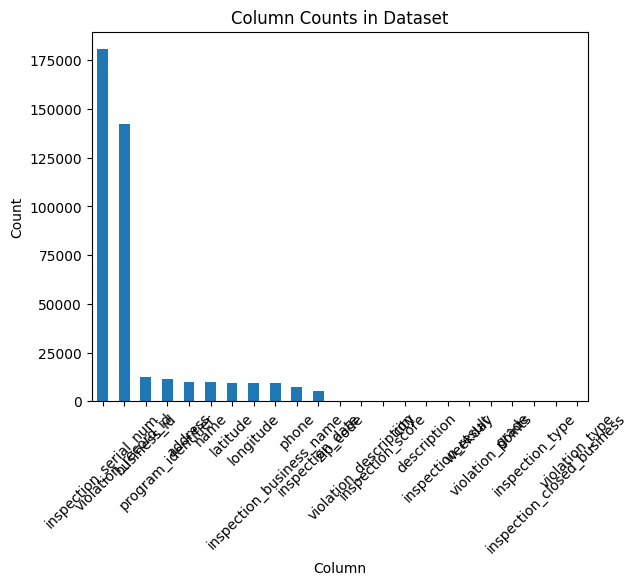

In [184]:
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques
# Create the bar plot
ax = df_uniques.plot(kind='bar', legend=False)

# Set the axis labels and title
ax.set_xlabel('Column')
ax.set_ylabel('Count')
ax.set_title('Column Counts in Dataset')

# # Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Display the plot
plt.show()


# Featurs

## Weekday 

<Axes: title={'center': 'Inspection times on weekdays'}, xlabel='weekday', ylabel='count'>

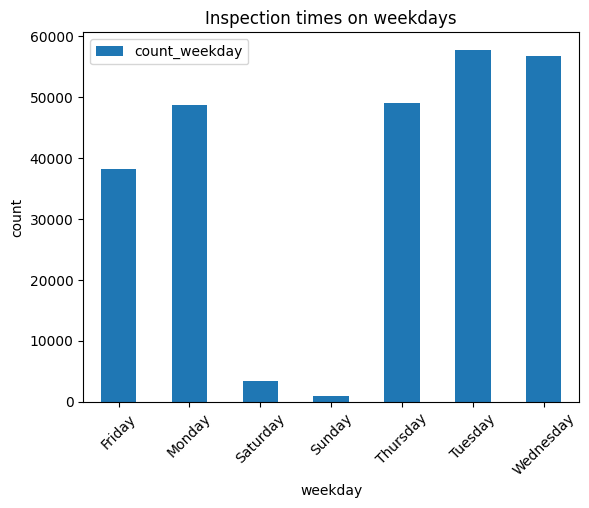

In [185]:
m = df.groupby('weekday').agg(count_weekday=('weekday','count'))
m.plot(kind='bar',
       # figsize=(5,2),
       xlabel='weekday',
       ylabel='count',
       rot=45, # rotate x label 
       # table=True, xlim=300, logy=True,
       title='Inspection times on weekdays',
      )

<Axes: title={'center': 'Inspection times on weekdays '}, ylabel='count_weekday'>

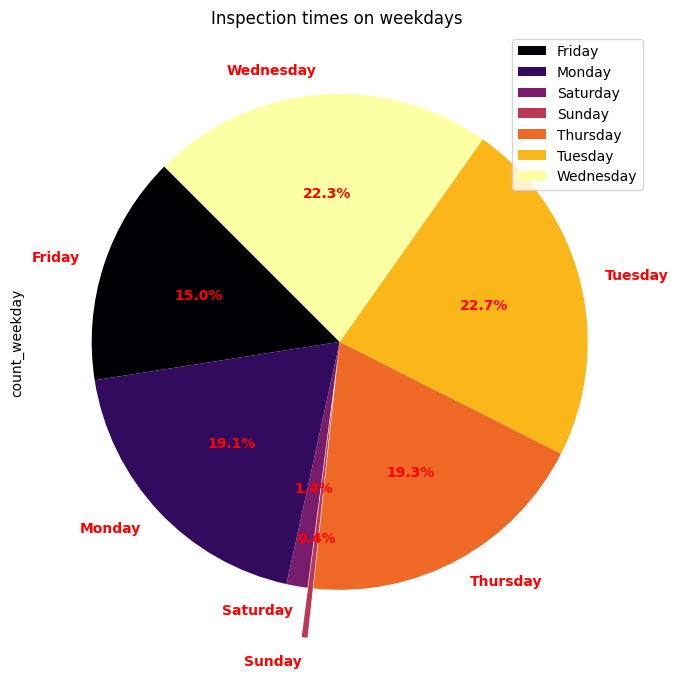

In [186]:
explode = (0.0, 0.0, 0.0, 0.2, 0.0, 0.0,0.0)
ax = m.plot(kind='pie', y='count_weekday',
       figsize=(8,15),
       colormap='inferno',
       explode = explode,
       # shadow=True,
       autopct='%1.1f%%',
       startangle=135,
       # hatch=['**', 'oO', 'O.O', '.||.', '/', '\\', '.'],
       title='Inspection times on weekdays ',

      )

from matplotlib.font_manager import FontProperties
font_props = FontProperties(weight='bold',)
for text in ax.texts:
    text.set_color('red')
    text.set_fontproperties(font_props)
ax

<Axes: title={'center': 'days'}, xlabel='inspection_date'>

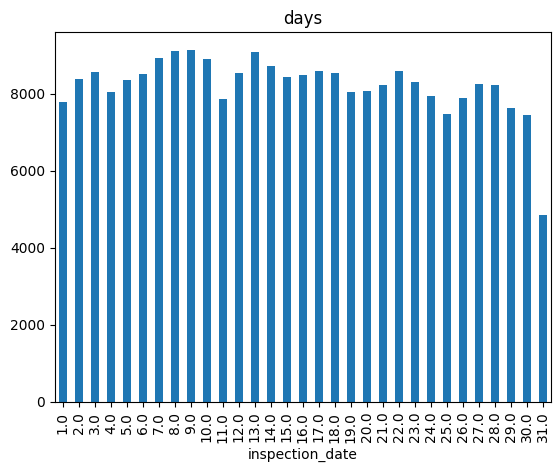

In [187]:
days_freq_gp = df.groupby([ df.inspection_date.dt.day]).agg('size')
days_freq_gp.plot(kind='bar', title="days")

<Axes: title={'center': 'months'}, xlabel='inspection_date'>

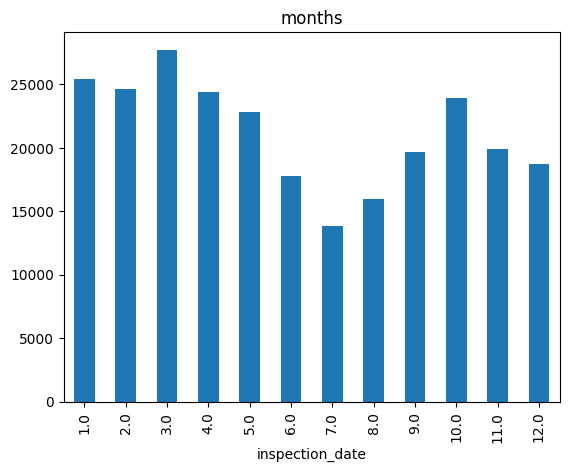

In [188]:
months_freq_gp = df.groupby([ df.inspection_date.dt.month]).agg('size')
months_freq_gp.plot(kind='bar', title="months")

<Axes: title={'center': 'years'}, xlabel='inspection_date'>

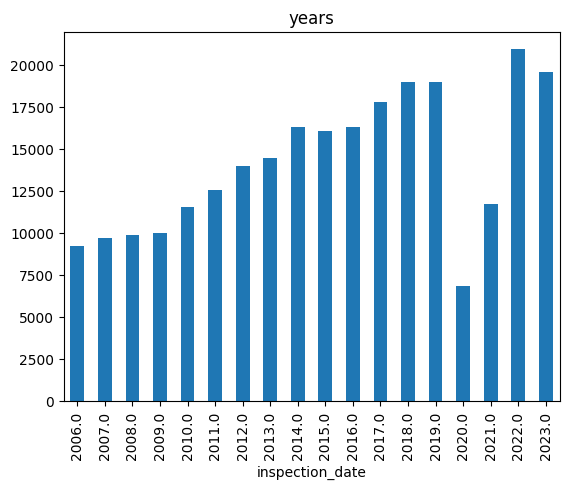

In [189]:
years_freq_gp = df.groupby([ df.inspection_date.dt.year]).agg('size')
years_freq_gp.plot(kind='bar', title="years")

<Axes: title={'center': 'years_months'}, xlabel='inspection_date,inspection_date'>

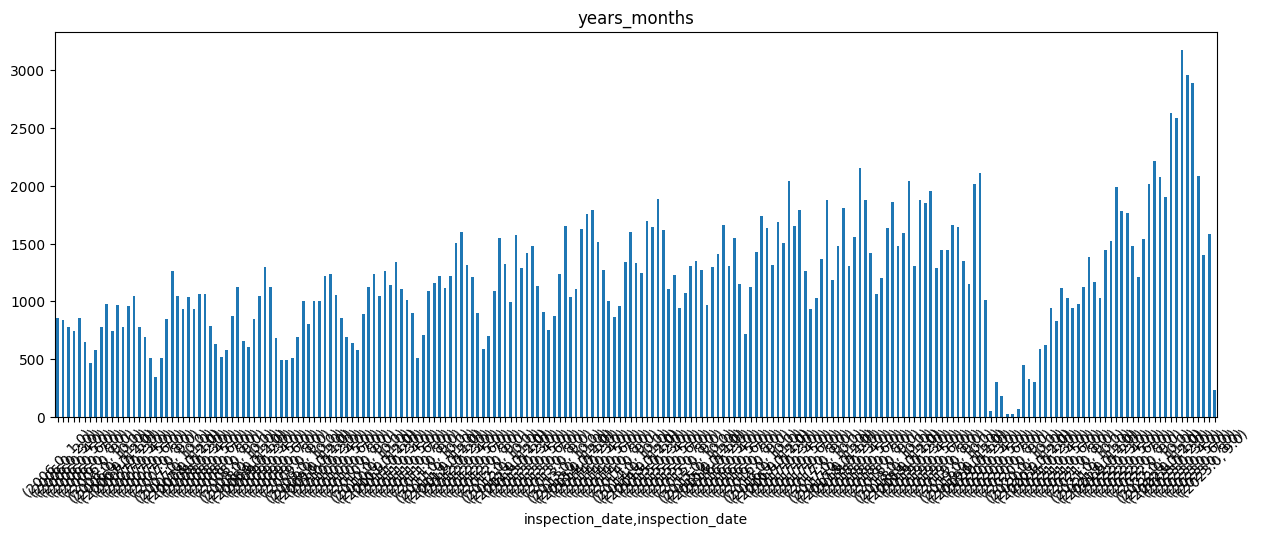

In [190]:
years_months_freq_gp = df.groupby([df.inspection_date.dt.year,df.inspection_date.dt.month]).agg('size')
years_months_freq_gp.plot(kind='bar', title="years_months", figsize=(15,5), legend=False, rot=45)

## Most City-Store violations 

In [191]:
pd.pivot_table(df,index=['city','name','grade'],columns=['violation_type'],aggfunc='size')

violation_type                                       BLUE   RED
city        name                              grade            
ALGONA      COCO JOE'S                        1.0    56.0  37.0
            TACOS EL TAJIN                    1.0     NaN   1.0
AUBURN      7-ELEVEN # 38940                  3.0     NaN  10.0
            7-ELEVEN #27219C                  2.0     3.0   5.0
            7-ELEVEN #35333B                  2.0    11.0  16.0
...                                                   ...   ...
WOODINVILLE WOODIN CREEK KITCHEN & TAP        1.0     NaN   1.0
            WOODINVILLE BAGEL BAKERY          2.0     2.0   7.0
            WOODINVILLE CAFE                  1.0     6.0  17.0
            WOODINVILLE CUT SHOP              1.0     3.0   4.0
            Walla Walla Steak Co- Woodinville 2.0     NaN   1.0

[6752 rows x 2 columns]

In [192]:
df_plot = df[['name','city','grade',]]
df_plot

,name,city,grade
0,#807 TUTTA BELLA,SEATTLE,1.0
1,#807 TUTTA BELLA,SEATTLE,1.0
2,#807 TUTTA BELLA,SEATTLE,1.0
3,#807 TUTTA BELLA,SEATTLE,1.0
4,#807 TUTTA BELLA,SEATTLE,1.0
...,...,...,...
255577,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255578,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255579,ZZ DESSERT,KENT,1.0
255580,ZZ DESSERT,KENT,1.0


## Map

<Axes: >

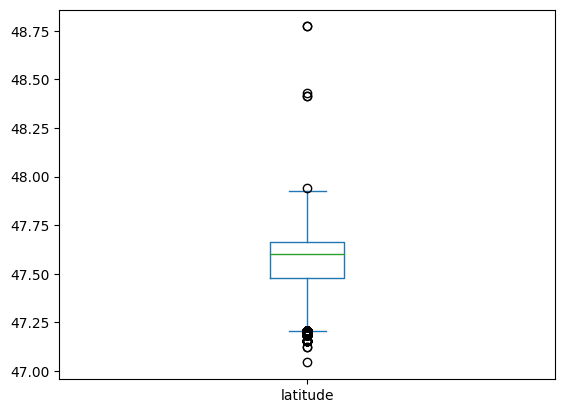

In [193]:
# Before remove outlier
df.latitude.plot(kind='box')

<Axes: >

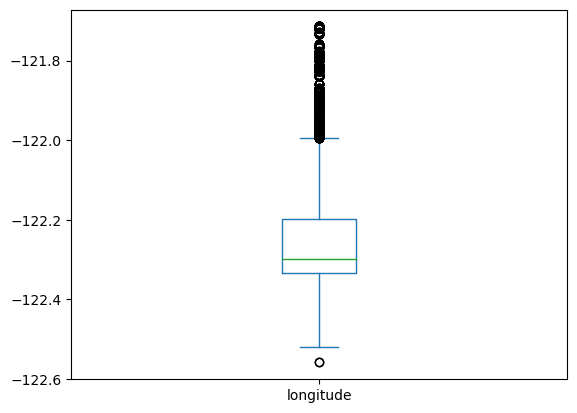

In [194]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = df[['latitude', 'longitude']].quantile(0.01)
q3 = df[['latitude', 'longitude']].quantile(0.90)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows that fall outside the acceptable range
df2 = df[((df[['latitude', 'longitude']] >= lower_bound) & (df[['latitude', 'longitude']] <= upper_bound)).all(axis=1)]

# After remove outlier
df2.longitude.plot(kind='box')

In [195]:
df3=df2.copy()

lat_bins = np.arange(df3.latitude.min(), df3.latitude.max(), 0.1)
lon_bins = np.arange(df3.longitude.min(), df3.longitude.max(), 0.1)

# Create bins for latitude and longitude
df3['latitude_bin'] = pd.cut(df3['latitude'], lat_bins)
df3['longitude_bin'] = pd.cut(df3['longitude'], lon_bins)

# Perform aggregation on the bins
agg_df = df3.groupby(['latitude_bin', 'longitude_bin']).agg('size').reset_index().rename(columns={0: '_size'})
agg_df

,latitude_bin,longitude_bin,_size
0,"(47.121, 47.221]","(-122.559, -122.459]",0
1,"(47.121, 47.221]","(-122.459, -122.359]",19
2,"(47.121, 47.221]","(-122.359, -122.259]",4
3,"(47.121, 47.221]","(-122.259, -122.159]",0
4,"(47.121, 47.221]","(-122.159, -122.059]",46
...,...,...,...
59,"(47.821, 47.921]","(-122.259, -122.159]",30
60,"(47.821, 47.921]","(-122.159, -122.059]",6
61,"(47.821, 47.921]","(-122.059, -121.959]",2
62,"(47.821, 47.921]","(-121.959, -121.859]",0


In [196]:
df4 = df3.copy()
df4 = df4.groupby(['latitude_bin', 'longitude_bin','inspection_result']).agg('size').reset_index().rename(columns={0: '_size'}).sort_values(
    ['latitude_bin', 'longitude_bin','_size'], ascending=False)
df4.describe()
df4[df4._size>0].describe()
df4[df4._size>0]


,latitude_bin,longitude_bin,inspection_result,_size
1114,"(47.821, 47.921]","(-122.059, -121.959]",Satisfactory,2
1096,"(47.821, 47.921]","(-122.159, -122.059]",Satisfactory,5
1084,"(47.821, 47.921]","(-122.159, -122.059]",Incomplete,1
1078,"(47.821, 47.921]","(-122.259, -122.159]",Satisfactory,17
1079,"(47.821, 47.921]","(-122.259, -122.159]",Unsatisfactory,8
...,...,...,...,...
73,"(47.121, 47.221]","(-122.159, -122.059]",Complete,6
89,"(47.121, 47.221]","(-122.159, -122.059]",Unsatisfactory,6
52,"(47.121, 47.221]","(-122.359, -122.259]",Satisfactory,2
53,"(47.121, 47.221]","(-122.359, -122.259]",Unsatisfactory,2


In [197]:
df3['violation_points']

0         15
1          5
2          5
3          5
4          0
          ..
255577     0
255578     0
255579     5
255580     5
255581     5
Name: violation_points, Length: 254750, dtype: int64

In [198]:
df3.inspection_score

0         20.0
1         20.0
2         10.0
3         10.0
4          0.0
          ... 
255577     0.0
255578     0.0
255579    10.0
255580    10.0
255581     5.0
Name: inspection_score, Length: 254750, dtype: float64

In [199]:
df.violation_type

0          RED
1          RED
2         BLUE
3          RED
4          NaN
          ... 
255577     NaN
255578     NaN
255579    BLUE
255580    BLUE
255581     RED
Name: violation_type, Length: 255582, dtype: object